In [1]:
from QAOA.qaoa_src.Ansatz import *
import scipy as sc
from qiskit.visualization import plot_histogram

In [2]:
# Generating random graph 
n = 4
rng_seed = int(np.random.randint(0,2**32-1))
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=False,w_min=1e-2,seed=rng_seed)

 # tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [0 0 1 1] cost = -4.0


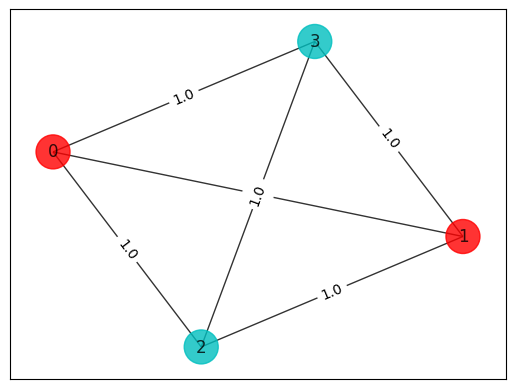

In [3]:
# Computing the weight dict from the random graph
w_dict = {}
for i, j, weight in edge_list:
    w_dict[(i,j)] = weight

# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [4]:
# Defining instance of QAOA circuit
QUBO_mat = get_qubo(size=n,edges=edge_list)
QUBO_dict = {}
for row in range(QUBO_mat.shape[0]):
    for col in range(QUBO_mat.shape[1]):
        if QUBO_mat[row, col] != 0.0: 
            QUBO_dict[(row,col)] = QUBO_mat[row,col] 

QAOA_objective = QAOAansatz(n_qubits=n,qubo_edges=QUBO_dict)

In [5]:
layers=5

theta_i = np.zeros(2*layers)
res = sc.optimize.minimize(fun=QAOA_objective.execute_circuit, x0=theta_i,method="Nelder-Mead")
theta_f = res.x.tolist()
res

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.25000000e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  6.25000000e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.25000000e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.25000000e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000

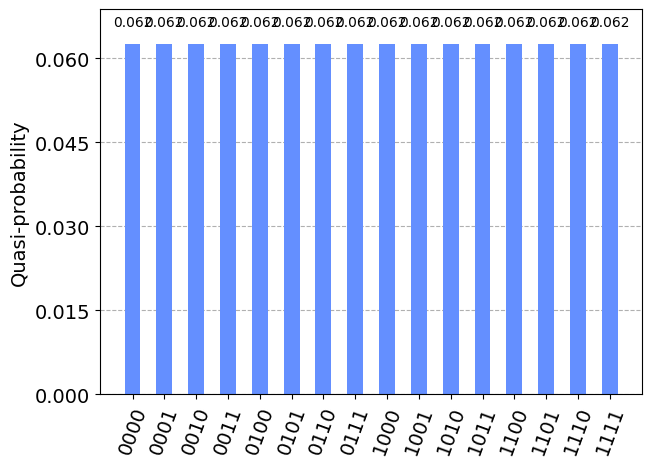

In [6]:
plot_histogram(QAOA_objective.set_circuit(theta=theta_f).get_state_probabilities())